In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from math import sqrt

from sklearn.model_selection import train_test_split
 
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae

import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis
#### Reading CSV file data.

In [170]:
df = pd.read_csv("2019_Iowa_Liquor_Sales.csv")

In [171]:
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-16681900011,01/02/2019,5286,Sauce,"108, College",Iowa City,52240.0,NaN,52.0,JOHNSON,...,48099,Hennessy VS,24,200,6.24,9.36,24,224.64,4.8,1.26
1,INV-16681900027,01/02/2019,5286,Sauce,"108, College",Iowa City,52240.0,NaN,52.0,JOHNSON,...,89191,Jose Cuervo Especial Reposado Mini,12,500,11.50,17.25,12,207.00,6.0,1.58
2,INV-16681900018,01/02/2019,5286,Sauce,"108, College",Iowa City,52240.0,NaN,52.0,JOHNSON,...,8824,Lauder's,24,375,3.21,4.82,24,115.68,9.0,2.37
3,INV-16685400036,01/02/2019,2524,Hy-Vee Food Store / Dubuque,3500 Dodge St,Dubuque,52001.0,NaN,31.0,DUBUQUE,...,35917,Five O'Clock Vodka,12,1000,4.17,6.26,12,75.12,12.0,3.17
4,INV-16690300035,01/02/2019,4449,Kum & Go #121 / Urbandale,12041 Douglas Pkwy,Urbandale,50322.0,NaN,77.0,POLK,...,36304,Hawkeye Vodka,24,375,1.86,2.79,24,66.96,9.0,2.37


Displaying first 5 rows.

In [172]:
# Last 5 rows
df.tail()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
2380340,INV-24281000038,12/31/2019,4557,Hometown Foods / Traer,420 Second St,Traer,50675.0,POINT (-92.468086 42.193386),86.0,TAMA,...,55106,Phillips Blackberry Brandy,12,750,4.76,7.14,4,28.56,3.00,0.79
2380341,INV-24284800010,12/31/2019,5514,Johncy's Liquor Store,585 Hwy 965 Ste D & E,North Liberty,52317.0,POINT (-91.60761 41.738129),52.0,JOHNSON,...,8828,Lauders,6,1750,11.18,16.77,6,100.62,10.50,2.77
2380342,INV-24274100040,12/31/2019,3932,Main Street Spirits / Mapleton,311 Main St,Mapleton,51034.0,POINT (-95.79375 42.165915),67.0,MONONA,...,80486,Tippy Cow Orange Cream,6,750,10.00,15.00,1,15.00,0.75,0.19
2380343,INV-24278900030,12/31/2019,5447,New Star / Raymond,101 Comerical Street,Raymond,50667.0,NaN,7.0,BLACK HAWK,...,18048,Evan Williams Green Label,6,1750,11.50,17.25,6,103.50,10.50,2.77
2380344,INV-24288400016,12/31/2019,3820,"Charlie's Wine and Spirits,",507 W 19th St,Sioux City,51103.0,POINT (-96.420193 42.510535),97.0,WOODBURY,...,27605,Tin Cup,12,750,13.75,20.63,1,20.63,0.75,0.19


In [173]:
#Printing the shape of the data.
df.shape

(2380345, 24)

##### Insight: We have around 2.4 millions rows and 24 columns in the dataset.

In [174]:
df.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

In [175]:
# Checknig the types of columns
df.dtypes

Invoice/Item Number       object
Date                      object
Store Number               int64
Store Name                object
Address                   object
City                      object
Zip Code                 float64
Store Location            object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number            float64
Vendor Name               object
Item Number                int64
Item Description          object
Pack                       int64
Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380345 entries, 0 to 2380344
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Date                   object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               float64
 7   Store Location         object 
 8   County Number          float64
 9   County                 object 
 10  Category               float64
 11  Category Name          object 
 12  Vendor Number          float64
 13  Vendor Name            object 
 14  Item Number            int64  
 15  Item Description       object 
 16  Pack                   int64  
 17  Bottle Volume (ml)     int64  
 18  State Bottle Cost      float64
 19  State Bottle Retail    float64
 20  Bottles Sold           int64  
 21  Sale (Dollars)         float64
 22  Volume Sold (Liter

In [177]:
# Displaying unique names of country
print(df['City'].nunique())
df['City'].unique()

429


array(['Iowa City', 'Dubuque', 'Urbandale', 'Ida Grove', 'Lake View',
       'Rock Rapids', 'Altoona', 'Indianola', 'Des Moines',
       'Cedar Rapids', 'Clear Lake', 'Muscatine', 'West Des Moines',
       'Monticello', 'Correctionville', 'Cherokee', 'Sheldon', 'Ankeny',
       'Johnston', 'Sac City', 'Boone', 'Central City', 'Holstein',
       'Waterloo', 'Cascade', 'Hawarden', 'Storm Lake', 'Gowrie',
       'Waukee', 'Mapleton', 'Sibley', 'Le Mars', 'Coralville',
       'Lake City', 'Cedar Falls', 'Paullina', 'Hartley', 'Marcus',
       'Hospers', 'Sioux Center', 'Peosta', 'Kingsley', 'Hiawatha',
       'Rockwell City', 'Larchwood', 'Earlham', 'Rock Valley',
       'Orange City', 'De Soto', 'Sanborn', 'Adel', 'Remsen', 'Dayton',
       'Lemars', 'Inwood', 'George', 'Manson', 'Hull', 'Doon', 'Primghar',
       'Shueyville', 'Ogden', 'Sutherland', 'Waukon', 'Davenport',
       'Camanche', 'Laurens', 'Ames', 'Atkins', 'Ottumwa', 'Chariton',
       'Knoxville', 'Huxley', 'Melcher-Dallas'

In [178]:
df['City'].value_counts()

Des Moines      203534
Cedar Rapids    157195
Davenport       101324
Waterloo         77216
Sioux City       74234
                 ...  
Albert City         54
Melbourne           28
Earling             26
Washta              15
Bussey               9
Name: City, Length: 429, dtype: int64

##### Insight: There are highest number of shops in the Des Moines city.

In [179]:
# Checking for the Null values
df.isnull().sum()

Invoice/Item Number           0
Date                          0
Store Number                  0
Store Name                    0
Address                    4764
City                       4764
Zip Code                   4764
Store Location           219390
County Number              4764
County                     4764
Category                   2918
Category Name              2918
Vendor Number                 1
Vendor Name                   1
Item Number                   0
Item Description              0
Pack                          0
Bottle Volume (ml)            0
State Bottle Cost             0
State Bottle Retail           0
Bottles Sold                  0
Sale (Dollars)                0
Volume Sold (Liters)          0
Volume Sold (Gallons)         0
dtype: int64

##### Insight: There are null values. So we will simply drop all such rows that also will reduce the size of dataset.

In [180]:
df.describe()

,Store Number,Zip Code,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,2.380345e+06,2.375581e+06,2.375581e+06,2.377427e+06,2.380344e+06,2.380345e+06,2.380345e+06,2.380345e+06,2.380345e+06,2.380345e+06,2.380345e+06,2.380345e+06,2.380345e+06,2.380345e+06
mean,3.903901e+03,5.126670e+04,5.730555e+01,1.052185e+06,2.647152e+02,4.836175e+04,1.242525e+01,8.766395e+02,1.034431e+01,1.551888e+01,1.127750e+01,1.467100e+02,9.368987e+00,2.469610e+00
std,1.138921e+03,9.881870e+02,2.727291e+01,9.329829e+04,1.370791e+02,6.708207e+04,8.108758e+00,5.214263e+02,8.568864e+00,1.285549e+01,3.131091e+01,4.871768e+02,3.824454e+01,1.010336e+01
min,2.106000e+03,5.000200e+04,1.000000e+00,1.011100e+06,3.300000e+01,1.590000e+02,1.000000e+00,2.000000e+01,8.900000e-01,1.340000e+00,1.000000e+00,1.340000e+00,2.000000e-02,0.000000e+00
25%,2.624000e+03,5.031600e+04,3.100000e+01,1.012200e+06,1.150000e+02,2.682800e+04,6.000000e+00,7.500000e+02,5.500000e+00,8.250000e+00,3.000000e+00,3.375000e+01,1.500000e+00,3.900000e-01
50%,3.952000e+03,5.110300e+04,6.200000e+01,1.031200e+06,2.600000e+02,3.817700e+04,1.200000e+01,7.500000e+02,8.250000e+00,1.238000e+01,6.000000e+00,7.536000e+01,4.800000e+00,1.260000e+00
75%,4.971000e+03,5.230200e+04,7.700000e+01,1.062400e+06,3.890000e+02,6.486400e+04,1.200000e+01,1.000000e+03,1.296000e+01,1.944000e+01,1.200000e+01,1.485600e+02,1.050000e+01,2.770000e+00
max,9.042000e+03,5.722200e+04,9.900000e+01,1.901200e+06,9.780000e+02,9.992920e+05,4.800000e+01,6.000000e+03,1.749120e+03,2.623680e+03,6.750000e+03,7.843500e+04,1.181250e+04,3.120530e+03


In [181]:
# Dropping null values rows and again checking shape of dataframe.
df.dropna(inplace = True)
print(df.shape)

(2158261, 24)


In [182]:
# Check for the duplicates values.
df.drop_duplicates()
df.shape

(2158261, 24)

#### Converting the date into month, day, year as separate column.

In [183]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [184]:
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year,Month,Day
16,INV-16677900018,2019-01-02,3870,Target Store T-1939 / Altoona,3414 8th St SW,Altoona,50009.0,POINT (-93.503783 41.644024),77.0,POLK,...,750,13.75,20.63,12,247.56,9.00,2.37,2019,1,2
30,INV-16678800049,2019-01-02,2527,Hy-Vee Food Store #5 / Des Moines,1107 SE Army Post Rd,Des Moines,50315.0,POINT (-93.602372 41.526289),77.0,POLK,...,1750,11.99,17.99,6,107.94,10.50,2.77,2019,1,2
31,INV-16676700070,2019-01-02,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314.0,POINT (-93.619787 41.60566),77.0,POLK,...,750,21.50,32.25,3,106.29,2.25,0.59,2019,1,2
32,INV-16678800065,2019-01-02,2527,Hy-Vee Food Store #5 / Des Moines,1107 SE Army Post Rd,Des Moines,50315.0,POINT (-93.602372 41.526289),77.0,POLK,...,750,8.25,12.38,12,148.56,9.00,2.37,2019,1,2
33,INV-16676700058,2019-01-02,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314.0,POINT (-93.619787 41.60566),77.0,POLK,...,750,31.00,46.50,2,93.00,1.50,0.39,2019,1,2


In [185]:
# Printing minimum and the maximum date from dataset.
print(df['Date'].min())
print(df['Date'].max())

2019-01-02 00:00:00
2019-12-31 00:00:00


##### Insight: So we have dataset from the 2nd january 2019 to 31st december 2015.

In [186]:
print(df['Category Name'].nunique())
df['Category Name'].unique()

53


array(['Blended Whiskies', 'American Dry Gins', 'Single Malt Scotch',
       'American Flavored Vodka', '100% Agave Tequila', 'Irish Whiskies',
       'Mixto Tequila', 'American Vodkas', 'Canadian Whiskies',
       'American Schnapps', 'Tennessee Whiskies',
       'Imported Flavored Vodka', 'Imported Brandies',
       'American Cordials & Liqueur', 'Imported Vodkas',
       'Imported Cordials & Liqueurs', 'White Rum', 'Imported Dry Gins',
       'Cream Liqueurs', 'Whiskey Liqueur',
       'Temporary & Specialty Packages', 'Scotch Whiskies',
       'American Brandies', 'Gold Rum', 'Flavored Gin', 'Flavored Rum',
       'Cocktails /RTD', 'Imported Schnapps', 'Straight Bourbon Whiskies',
       'Spiced Rum', 'American Distilled Spirit Specialty',
       'Imported Distilled Spirit Specialty', 'Neutral Grain Spirits',
       'Straight Rye Whiskies', 'Aged Dark Rum',
       'Neutral Grain Spirits Flavored', 'Corn Whiskies', 'Triple Sec',
       'Coffee Liqueurs', 'Bottled in Bond Bourbon', '

##### Insight: As we can see there are 53 unique different categories of liquors.

In [187]:
# Replacing the dollar symbol in the sales column by None

df['Sale (Dollars)'] = df['Sale (Dollars)'].replace('$', '')
df['Sale (Dollars)'] = df['Sale (Dollars)'].astype('float')

#### Top 10 categories of liquors that has highest sale.

In [188]:
df_plot = df.fillna('NA').groupby(['Category Name','Pack','Date'])['Sale (Dollars)'].sum().groupby(
            ['Category Name','Pack']).max().sort_values().groupby(
            ['Category Name']).sum().sort_values(ascending=False)
top_count = pd.DataFrame(df_plot)
top_count1 = pd.DataFrame(df_plot.head(10))

In [189]:
top_count1

,Sale (Dollars)
Category Name,
Canadian Whiskies,657979.89
American Vodkas,392981.25
Temporary & Specialty Packages,379523.82
Imported Vodkas,324551.64
Straight Bourbon Whiskies,268459.53
Whiskey Liqueur,206680.49
Spiced Rum,199129.04
Tennessee Whiskies,164095.12
100% Agave Tequila,155288.31


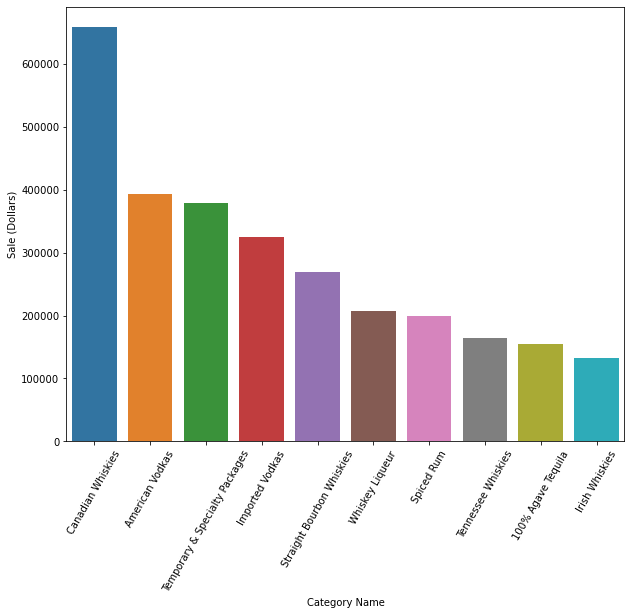

In [190]:
#top_count1['Sale (Dollars)'].plot(kind='bar',title="Sales of liquor per category")
plt.figure(figsize=(10,8))
plt.xticks(rotation=60)
sns.barplot(x=top_count1.index, y='Sale (Dollars)',data=top_count1)
plt.show()


##### Insight: As we can see that the canadian whiskies has high number of sales may be becuase peoples like to drink it more or it can be very famous liquor brand as well.

#### Sales of liquor by city name (top 20).

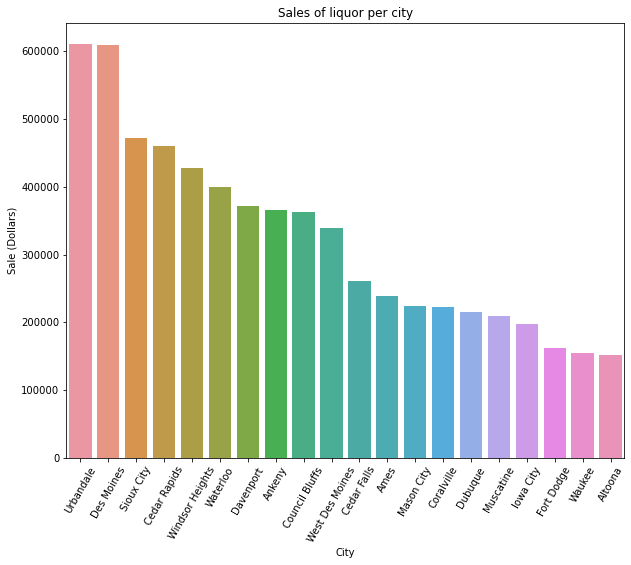

In [191]:
df_plot = df.fillna('NA').groupby(['City','Pack','Date'])['Sale (Dollars)'].sum().groupby(
            ['City','Pack']).max().sort_values().groupby(
            ['City']).sum().sort_values(ascending=False)
top_count1 = pd.DataFrame(df_plot)
top_count1 = pd.DataFrame(df_plot.head(20))

plt.figure(figsize=(10,8))
plt.xticks(rotation=60)
sns.barplot(data=top_count1,x=top_count1.index, y='Sale (Dollars)')
plt.title("Sales of liquor per city")
plt.show()

##### Insight: The Urbandale city has highest sales of liquors.

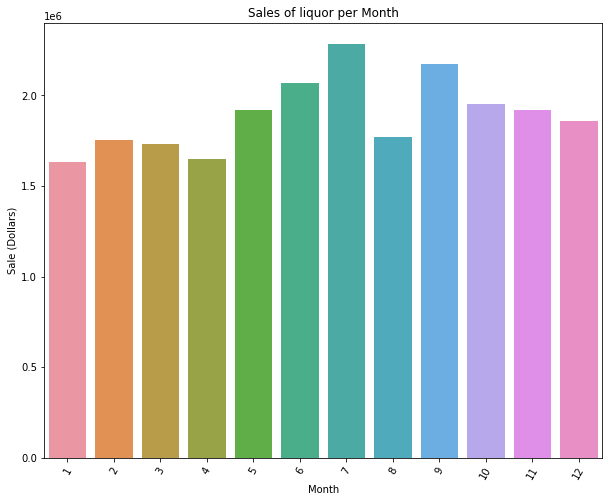

In [192]:
df_plot = df.fillna('NA').groupby(['Month','Pack','Date'])['Sale (Dollars)'].sum().groupby(
            ['Month','Pack']).max().sort_values().groupby(
            ['Month']).sum().sort_values(ascending=False)
top_count1 = pd.DataFrame(df_plot)
top_count1 = pd.DataFrame(df_plot.head(50))

plt.figure(figsize=(10,8))
plt.xticks(rotation=60)
sns.barplot(data=top_count1,x=top_count1.index, y='Sale (Dollars)')
plt.title("Sales of liquor per Month")
plt.show()

##### Insight: From the avove plot it is cleared that the July month has highest number of sales of liquors.

In [193]:
daily_sales = df.groupby('Date', as_index=False)['Sale (Dollars)'].sum()

In [194]:
daily_sales

,Date,Sale (Dollars)
0,2019-01-02,941321.41
1,2019-01-03,1015428.57
2,2019-01-04,1289420.54
3,2019-01-07,1324338.28
4,2019-01-08,890735.28
...,...,...
259,2019-12-26,1668684.96
260,2019-12-27,1752258.88
261,2019-12-28,928699.61
262,2019-12-30,1339049.52


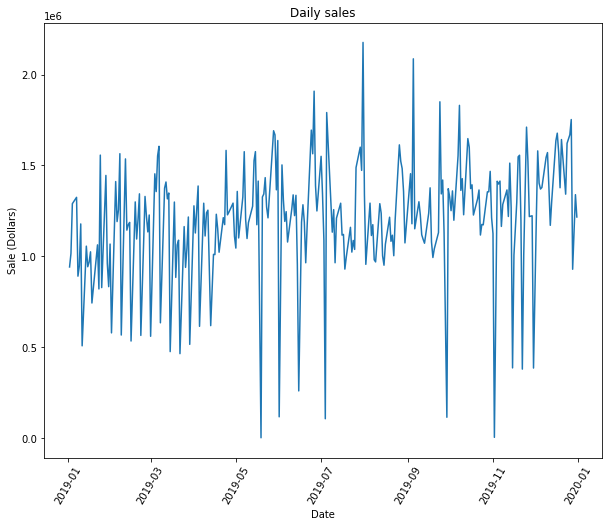

In [195]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=60)
sns.lineplot(x=daily_sales['Date'], y=daily_sales['Sale (Dollars)'])
plt.title('Daily sales')
plt.show()

##### Insight: In july-august there is large sales of the liquors.

#### Sales of liquors with category and the volume of liquor sold.

In [196]:
df_plot = df.fillna('NA').groupby(['Category Name','Pack','Date'])['Sale (Dollars)'].sum().groupby(
            ['Category Name','Pack']).max().sort_values().groupby(
            ['Category Name']).sum().sort_values(ascending=False)
top_count1 = pd.DataFrame(df_plot)
#top_count1 = pd.DataFrame(df_plot.head(10))

df_plot = df.fillna('NA').groupby(['Category Name','Pack','Date'])['Volume Sold (Liters)'].sum().groupby(
            ['Category Name','Pack']).max().sort_values().groupby(
            ['Category Name']).sum().sort_values(ascending=False)
top_count2 = pd.DataFrame(df_plot)
#top_count2 = pd.DataFrame(df_plot.head(10))

In [197]:
# Ordrening the countries by number of fatalities
top_count = pd.concat([top_count1 , top_count2],axis=1)
top_count = top_count.sort_values(['Sale (Dollars)'],ascending=False)[:10]
top_count

,Sale (Dollars),Volume Sold (Liters)
Canadian Whiskies,657979.89,36879.27
American Vodkas,392981.25,39594.42
Temporary & Specialty Packages,379523.82,13315.62
Imported Vodkas,324551.64,21969.49
Straight Bourbon Whiskies,268459.53,10529.56
Whiskey Liqueur,206680.49,12911.68
Spiced Rum,199129.04,12612.02
Tennessee Whiskies,164095.12,5624.39
100% Agave Tequila,155288.31,8058.04
Irish Whiskies,132052.92,4283.30


<Figure size 720x576 with 0 Axes>

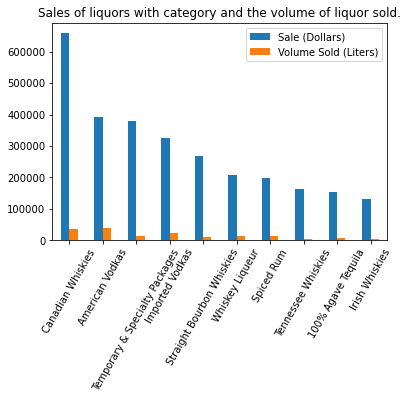

In [202]:
plt.figure(figsize=(10,8))
top_count.plot.bar()
plt.xticks(rotation=60)
plt.title("Sales of liquors with category and the volume of liquor sold.")
plt.show()

##### Insight: Canadian Whiskies has highest sale with the 36K litre.

#### Volume sold in litres by vendor name.

In [213]:
df_plot = df.fillna('NA').groupby(['Vendor Name','Pack','Date'])['Volume Sold (Liters)'].sum().groupby(
            ['Vendor Name','Pack']).max().sort_values().groupby(
            ['Vendor Name']).sum().sort_values(ascending=False)
top_count1 = pd.DataFrame(df_plot)
#top_count1 = pd.DataFrame(df_plot.head(50))
top_count1

,Volume Sold (Liters)
Vendor Name,
DIAGEO AMERICAS,38002.68
SAZERAC COMPANY INC,28136.87
CONSTELLATION BRANDS INC,27778.16
Heaven Hill Brands,19219.34
LUXCO INC,19015.04
...,...
World Trade Liquor Imports LLC,4.50
Strong Spirits Distilling,3.00
Three Rangers,2.25


In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(data=top_count1,x=top_count1.index, y='Volume Sold (Liters)')
plt.xticks(rotation=90)
plt.title("Volume sold by vendor name")
plt.show()

##### The vendor DIAGEO AMERICAS has sold out the highest number of liquors in terms of its volume.

## Data Preprocessing and Feature Engineering for ML models

##### Dropping the unnecessary columns

As we can see in our data there are columns like Item Number, Zip Code, etc which does not make any sense or not important for the prediction of alcohol sales. So in the next cell we will drop such columns.

In [216]:
df.drop(['Invoice/Item Number', 'Date', 'Store Number', 'Address', 'Zip Code', 'Store Location', 'County Number', 
        'Category', 'Vendor Number', 'Item Number', 'Item Description', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'], 
        axis=1, 
        inplace=True)

In [217]:
df.columns

Index(['Store Name', 'City', 'County', 'Category Name', 'Vendor Name', 'Pack',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Sale (Dollars)', 'Year', 'Month', 'Day'],
      dtype='object')

In [218]:
df.shape

(2158261, 14)

In [219]:
df.head()

,Store Name,City,County,Category Name,Vendor Name,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Year,Month,Day
16,Target Store T-1939 / Altoona,Altoona,POLK,Blended Whiskies,PROXIMO,12,750,13.75,20.63,12,247.56,2019,1,2
30,Hy-Vee Food Store #5 / Des Moines,Des Moines,POLK,American Dry Gins,PERNOD RICARD USA,6,1750,11.99,17.99,6,107.94,2019,1,2
31,"Central City Liquor, Inc.",Des Moines,POLK,Single Malt Scotch,Jim Beam Brands,6,750,21.50,32.25,3,106.29,2019,1,2
32,Hy-Vee Food Store #5 / Des Moines,Des Moines,POLK,American Flavored Vodka,DIAGEO AMERICAS,12,750,8.25,12.38,12,148.56,2019,1,2
33,"Central City Liquor, Inc.",Des Moines,POLK,100% Agave Tequila,Patron Spirits Company,12,750,31.00,46.50,2,93.00,2019,1,2


In [220]:
# Replacing the dollar symbol in the 'State Bottle Cost' and 'State Bottle Retail' column by None. 

df['State Bottle Cost'] = df['State Bottle Cost'].replace('$', '')
df['State Bottle Cost'] = df['State Bottle Cost'].astype('float')

df['State Bottle Retail'] = df['State Bottle Retail'].replace('$', '')
df['State Bottle Retail'] = df['State Bottle Retail'].astype('float')

### Correlations
* Finally, let's take a look at the relationships between numeric features and other numeric features.
* ***Correlation*** is a value between -1 and 1 that represents how closely values for two separate features move in unison.
* Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.
* Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.
* Correlations near -1 or 1 indicate a strong relationship.
* Those closer to 0 indicate a weak relationship.
* 0 indicates no relationship.

In [222]:
df.corr()

,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Year,Month,Day
Pack,1.000000,-0.566315,-0.362728,-0.362688,0.178106,-0.047212,NaN,-0.007155,-0.001046
Bottle Volume (ml),-0.566315,1.000000,0.260903,0.260853,-0.031256,0.078052,NaN,-0.066078,-0.000349
State Bottle Cost,-0.362728,0.260903,1.000000,0.999817,-0.069918,0.114538,NaN,0.016197,0.003439
State Bottle Retail,-0.362688,0.260853,0.999817,1.000000,-0.069905,0.114521,NaN,0.016238,0.003477
Bottles Sold,0.178106,-0.031256,-0.069918,-0.069905,1.000000,0.802260,NaN,0.007083,0.001607
Sale (Dollars),-0.047212,0.078052,0.114538,0.114521,0.802260,1.000000,NaN,0.010863,0.002744
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,-0.007155,-0.066078,0.016197,0.016238,0.007083,0.010863,NaN,1.000000,0.007087
Day,-0.001046,-0.000349,0.003439,0.003477,0.001607,0.002744,NaN,0.007087,1.000000


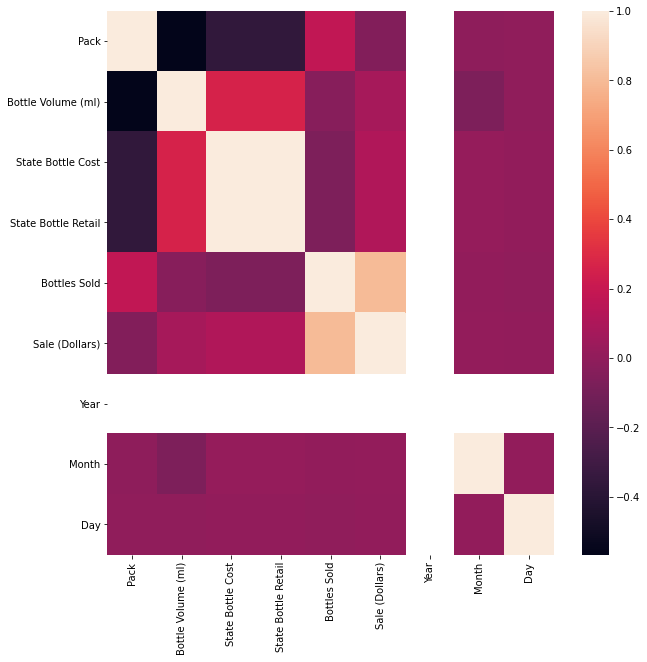

In [223]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

#### Encoding categorical variables.

It is necessary to convert the categorical variable into numbers as ML models only takes the numbers as a input. So in our dataset the columns like Store Name, Category Name, Vendor Name are categorical.

In [225]:
label_en1 = LabelEncoder()
df['Store Name'] = label_en1.fit_transform(df['Store Name'])

label_en2 = LabelEncoder()
df['Category Name'] = label_en2.fit_transform(df['Category Name'])

label_en3 = LabelEncoder()
df['Vendor Name'] = label_en3.fit_transform(df['Vendor Name'])

label_en4 = LabelEncoder()
df['County'] = label_en4.fit_transform(df['County'])

label_en5 = LabelEncoder()
df['City'] = label_en5.fit_transform(df['City'])

In [226]:
df.dtypes

Store Name               int32
City                     int32
County                   int32
Category Name            int32
Vendor Name              int32
Pack                     int64
Bottle Volume (ml)       int64
State Bottle Cost      float64
State Bottle Retail    float64
Bottles Sold             int64
Sale (Dollars)         float64
Year                     int64
Month                    int64
Day                      int64
dtype: object

##### Insight: Now all the variables are converted into the numbers as per the requirement.

In [227]:
df.reset_index(inplace = True)
df.head()

,index,Store Name,City,County,Category Name,Vendor Name,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Year,Month,Day
0,16,1403,14,97,13,128,12,750,13.75,20.63,12,247.56,2019,1,2
1,30,861,102,97,7,125,6,1750,11.99,17.99,6,107.94,2019,1,2
2,31,519,102,97,42,82,6,750,21.50,32.25,3,106.29,2019,1,2
3,32,861,102,97,8,36,12,750,8.25,12.38,12,148.56,2019,1,2
4,33,519,102,97,0,131,12,750,31.00,46.50,2,93.00,2019,1,2


In [228]:
df.rename({'Store Name':'Store_Name','Category Name':'Category_Name','Vendor Name':'Vendor_Name','Bottle Volume (ml)':'Bottle_Volume_(ml)','State Bottle Cost':'State_Bottle_Cost','State Bottle Retail':'State_Bottle_Retail','Bottles Sold':'Bottles_Sold','Sale (Dollars)':'Sale_(Dollars)'},axis=1)

,index,Store_Name,City,County,Category_Name,Vendor_Name,Pack,Bottle_Volume_(ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_(Dollars),Year,Month,Day
0,16,1403,14,97,13,128,12,750,13.75,20.63,12,247.56,2019,1,2
1,30,861,102,97,7,125,6,1750,11.99,17.99,6,107.94,2019,1,2
2,31,519,102,97,42,82,6,750,21.50,32.25,3,106.29,2019,1,2
3,32,861,102,97,8,36,12,750,8.25,12.38,12,148.56,2019,1,2
4,33,519,102,97,0,131,12,750,31.00,46.50,2,93.00,2019,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158256,2380339,892,339,91,20,36,12,1000,17.09,25.64,4,102.56,2019,12,31
2158257,2380340,785,375,111,2,132,12,750,4.76,7.14,4,28.56,2019,12,31
2158258,2380341,959,280,64,40,148,6,1750,11.18,16.77,6,100.62,2019,12,31
2158259,2380342,1146,238,83,20,109,6,750,10.00,15.00,1,15.00,2019,12,31


In [229]:
#Separating target feature
X = df.drop(['Sale (Dollars)', 'index'], axis = 1)
y = df['Sale (Dollars)']

#### Data standardization
* In Data Standardization we perform zero mean centring and unit scaling; i.e. we make the mean of all the features as zero and the standard deviation as 1.
* Thus we use **mean** and **standard deviation** of each feature.
* It is very important to save the **mean** and **standard deviation** for each of the feature from the **training set**, because we use the same mean and standard deviation in the test set.

In [230]:
a = StandardScaler()
X = a.fit_transform(X)

In [231]:
X.mean()

8.505829809106511e-17

In [232]:
X.std()

0.960768922830524

#### Train and validation split

As we have to developed the model to predict the sales of alcohol so we will build the regression model and accordingly also do the splitting of the data.

In [234]:
# Split X and y into train and test sets: 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [235]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1726608, 13) (431653, 13) (1726608,) (431653,)


## Machine Learning Models

#### 1. Ridge Regression

In [237]:
ridge1 = Ridge()
ridge1.fit(X_train, y_train)

Ridge()

In [238]:
## Predict Test results
y_pred = ridge1.predict(X_test)


print("Validation Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Validation Results for Ridge Regression:
*******************************
Root mean squared error:  273.55029262696297
R-squared:  0.6768173561574655
Mean Absolute Error:  77.93500931647883


#### Feature Importance

In [240]:
## Building the model again with the best hyperparameters
model = Ridge(alpha=1)
model.fit(X_train, y_train)

Ridge(alpha=1)

In [241]:
lst = ['Store Name', 'City', 'County', 'Category Name', 'Vendor Name',
       'Pack', 'Bottle Volume (ml)', 'State Bottle Cost',
       'State Bottle Retail', 'Bottles Sold', 'Year',
       'Month', 'Day']

In [242]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
#print(indices)
for i in range(len(indices)):
    print(lst[indices[i]])

The features in order of importance are:
--------------------------------------------------
Bottles Sold
Pack
State Bottle Cost
Vendor Name
Bottle Volume (ml)
State Bottle Retail
Category Name
Store Name
City
County
Day
Month
Year


#### 2. Random Forest

In [244]:
random1 = RandomForestRegressor()
random1.fit(X_train, y_train)

RandomForestRegressor()

In [245]:
## Predict Test results
y_pred = random1.predict(X_test)


print("Validation Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Validation Results for Random Forest Regression:
*******************************
Root mean squared error:  50.10283395970329
R-squared:  0.9891582785491398
Mean Absolute Error:  0.44258035328009265


#### Feature Importance

In [246]:
## Building the model again with the best hyperparameters
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [247]:
indices = np.argsort(-abs(model.feature_importances_))
print("The features in order of importance are:")
print(50*'-')
#print(indices)
for i in range(len(indices)):
    print(lst[indices[i]])

The features in order of importance are:
--------------------------------------------------
Bottles Sold
State Bottle Retail
State Bottle Cost
Category Name
Vendor Name
Store Name
Day
Month
County
City
Pack
Bottle Volume (ml)
Year


#### 3. XGBoost

In [248]:
xgb1 = XGBRegressor(n_estimators=100)
xgb1.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [249]:
## Predict Test results
y_pred = xgb1.predict(X_test)


print("Validation Results for Xgboost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Validation Results for Xgboost Regression:
*******************************
Root mean squared error:  45.50803632276961
R-squared:  0.9910556279845306
Mean Absolute Error:  2.8453725447879816


#### Feature Importance

In [250]:
## Building the model again with the best hyperparameters
model = XGBRegressor(n_estimators=100)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [251]:
indices = np.argsort(-abs(model.feature_importances_))
print("The features in order of importance are:")
print(50*'-')
#print(indices)
for i in range(len(indices)):
    print(lst[indices[i]])

The features in order of importance are:
--------------------------------------------------
Bottles Sold
State Bottle Cost
State Bottle Retail
Vendor Name
Day
Month
Store Name
Pack
City
Category Name
Bottle Volume (ml)
County
Year


#### Conclusion: From the preformance of the 3 models we can say that the XGBoost has performed very well. So saving the model to the disk.

In [252]:
import pickle
pickle.dump(xgb1, open('model.pkl','wb'))   # Saving the model